[-10.          -9.31034483  -8.62068966  -7.93103448  -7.24137931
  -6.55172414  -5.86206897  -5.17241379  -4.48275862  -3.79310345
  -3.10344828  -2.4137931   -1.72413793  -1.03448276  -0.34482759
   0.34482759   1.03448276   1.72413793   2.4137931    3.10344828
   3.79310345   4.48275862   5.17241379   5.86206897   6.55172414
   7.24137931   7.93103448   8.62068966   9.31034483  10.        ]
[1.         0.77586207 0.61576355 0.49568966 0.40229885 0.32758621
 0.26645768 0.21551724 0.17241379 0.13546798 0.10344828 0.07543103
 0.05070994 0.02873563 0.00907441 0.00862069 0.02463054 0.03918495
 0.05247376 0.06465517 0.07586207 0.0862069  0.09578544 0.1046798
 0.11296076 0.12068966 0.12791991 0.13469828 0.14106583 0.14705882]


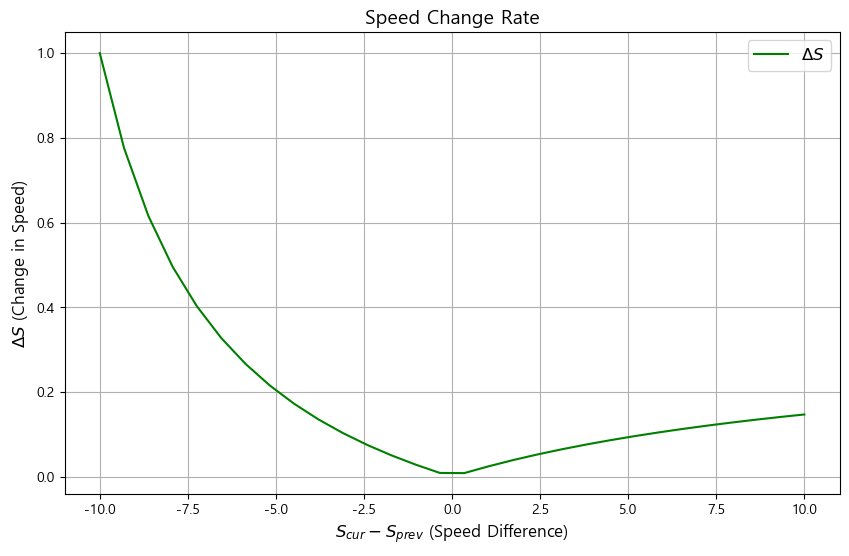

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

S_prev = np.arange(10, 70, 2)

S_cur = S_prev + np.linspace(-10, 10, len(S_prev))

delta_S = np.where(S_prev != 0, np.abs(S_cur - S_prev) / S_prev, 0)

abs_delta_S = S_cur - S_prev

print(abs_delta_S)
print(delta_S)

plt.figure(figsize=(10, 6))
plt.plot(abs_delta_S, delta_S, label="$\\Delta S$", color="green")
plt.title("Speed Change Rate", fontsize=14)
plt.xlabel("$S_{cur} - S_{prev}$ (Speed Difference)", fontsize=12)
plt.ylabel("$\\Delta S$ (Change in Speed)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()


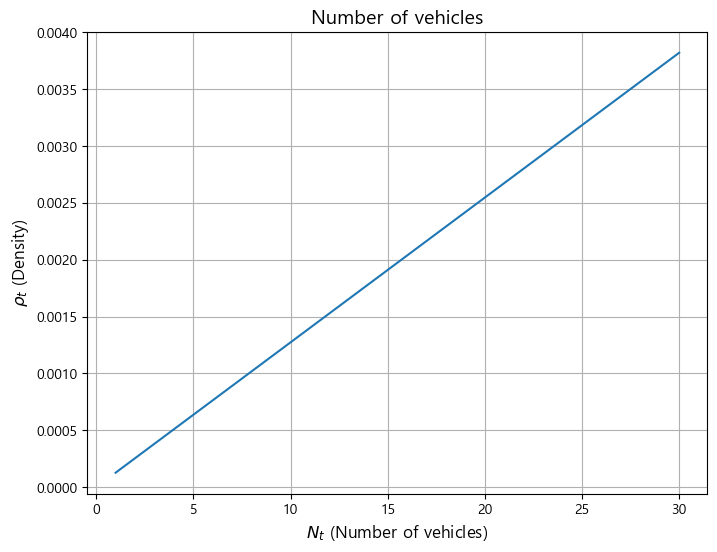

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')

R = 50 
N_t = np.arange(1, 31)

rho_t = N_t / (np.pi * R**2)

plt.figure(figsize=(8, 6))
plt.plot(N_t, rho_t)
plt.title("Number of vehicles", fontsize=14)
plt.xlabel("$N_t$ (Number of vehicles)", fontsize=12)
plt.ylabel("$\\rho_t$ (Density)", fontsize=12)
plt.grid()
plt.show()


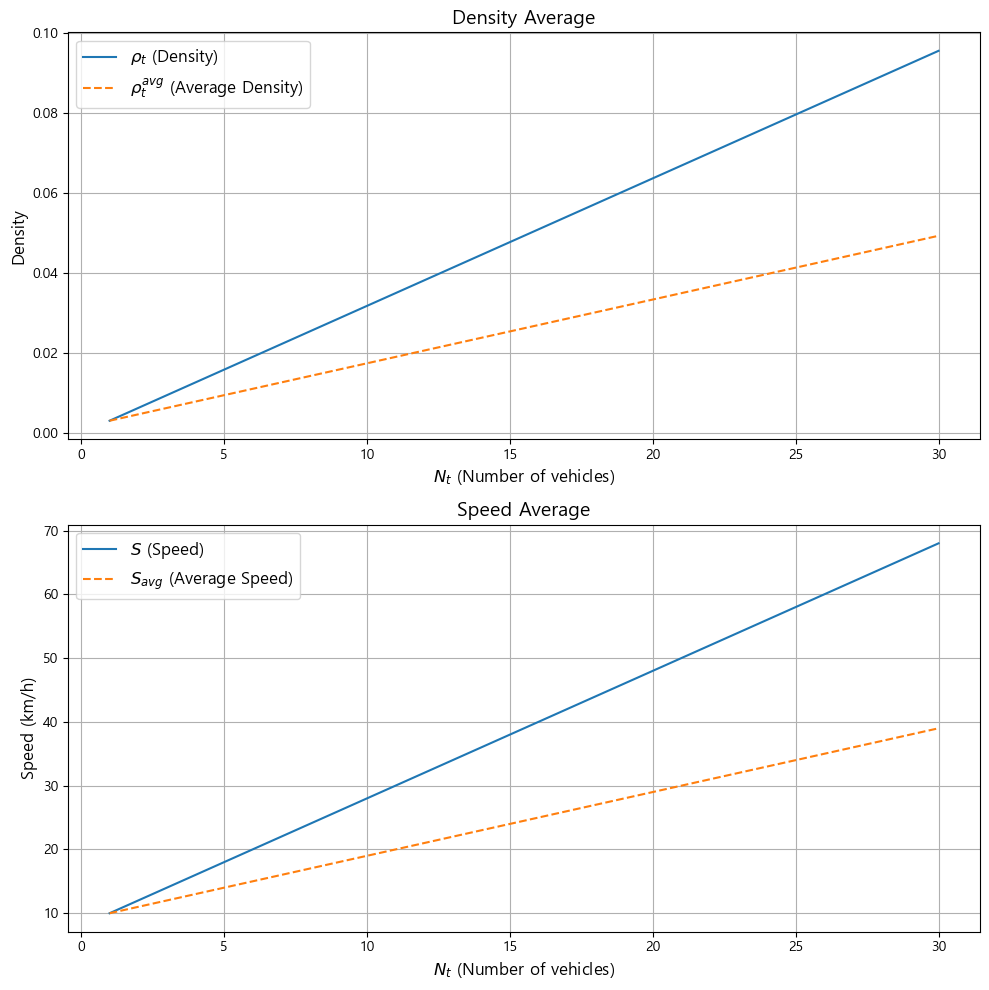

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')

R = 10
N_t = np.arange(1, 31)
S = np.arange(10, 71, 2)

S = S[:len(N_t)]

rho_t = N_t / (np.pi * R**2)

rho_t_avg = np.cumsum(rho_t) / np.arange(1, len(rho_t) + 1)

S_avg = np.cumsum(S) / np.arange(1, len(S) + 1)

fig, axs = plt.subplots(2, 1, figsize=(10, 10))

axs[0].plot(N_t, rho_t, label="$\\rho_t$ (Density)")
axs[0].plot(N_t, rho_t_avg, label="$\\rho_t^{avg}$ (Average Density)", linestyle="--")
axs[0].set_title("Density Average", fontsize=14)
axs[0].set_xlabel("$N_t$ (Number of vehicles)", fontsize=12)
axs[0].set_ylabel("Density", fontsize=12)
axs[0].legend(fontsize=12)
axs[0].grid()

axs[1].plot(N_t, S, label="$S$ (Speed)")
axs[1].plot(N_t, S_avg, label="$S_{avg}$ (Average Speed)", linestyle="--")
axs[1].set_title("Speed Average", fontsize=14)
axs[1].set_xlabel("$N_t$ (Number of vehicles)", fontsize=12)
axs[1].set_ylabel("Speed (km/h)", fontsize=12)
axs[1].legend(fontsize=12)
axs[1].grid()

plt.tight_layout()
plt.show()


[-10.          -8.94736842  -7.89473684  -6.84210526  -5.78947368
  -4.73684211  -3.68421053  -2.63157895  -1.57894737  -0.52631579
   0.52631579   1.57894737   2.63157895   3.68421053   4.73684211
   5.78947368   6.84210526   7.89473684   8.94736842  10.        ]


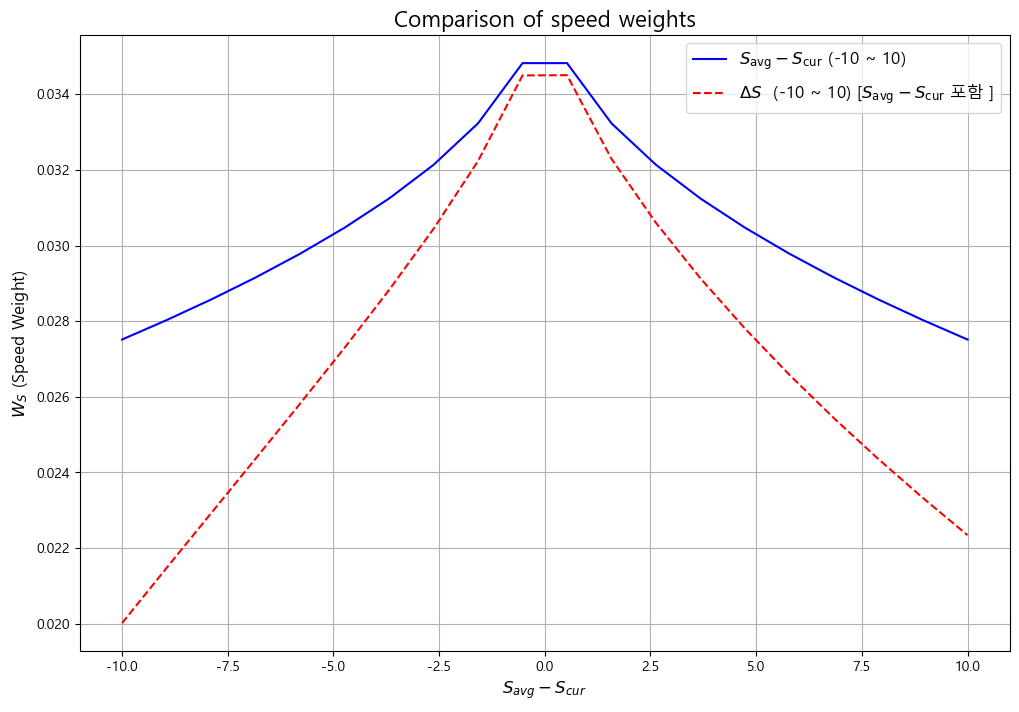

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')

W_base_S = 0.037
F_S = -0.003
F_change = -0.03
W_min = 0.01
W_max = 0.10

S_prev_1 = np.arange(30, 70, 2)
S_cur_1 = np.arange(30, 70, 2)
S_avg_1 = np.mean(S_cur_1)

diff_1 = np.linspace(-10, 10, len(S_cur_1))
S_avg_1 = S_cur_1 + diff_1

delta_S_1 = np.where(S_prev_1 != 0, (S_cur_1 - S_prev_1) / S_prev_1, 0)

W_S_1 = np.clip(
    W_base_S +
    np.maximum(
        -0.03,
        np.minimum(np.sqrt(np.abs(S_cur_1 - S_avg_1)) * F_S, 0.03)
    ) +
    np.maximum(
        -0.02,
        np.minimum(delta_S_1 * F_change, 0.02)
    ),
    W_min, W_max
)

print(S_avg_1 - S_cur_1)

S_cur_2 = np.arange(30, 70, 2)
adjustment = np.linspace(10, -10, len(S_cur_2))
S_prev_2 = S_cur_2 + adjustment
S_avg_2 = np.mean(S_cur_2)

diff_2 = np.linspace(-10, 10, len(S_cur_2))
S_avg_2 = S_cur_2 + diff_2

delta_S_2 = np.where(S_prev_2 != 0, np.abs(S_cur_2 - S_prev_2) / S_prev_2, 0)

W_S_2 = np.clip(
    W_base_S +
    np.maximum(
        -0.03,
        np.minimum(np.sqrt(np.abs(S_cur_2 - S_avg_2)) * F_S, 0.03)
    ) +
    np.maximum(
        -0.02,
        np.minimum(delta_S_2 * F_change, 0.02)
    ),
    W_min, W_max
)

plt.figure(figsize=(12, 8))

plt.plot(diff_1, W_S_1, label=r"$S_{\text{avg}} - S_{\text{cur}}$ (-10 ~ 10)", color="blue")
plt.plot(diff_2, W_S_2, label=r"$\Delta S$  (-10 ~ 10) [$S_{\text{avg}} - S_{\text{cur}} $ 포함 ]", color="red", linestyle="--")

plt.title("Comparison of speed weights", fontsize=16)
plt.xlabel("$S_{\t{avg}} - S_{\t{cur}}$", fontsize=12)
plt.ylabel("$W_S$ (Speed Weight)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()


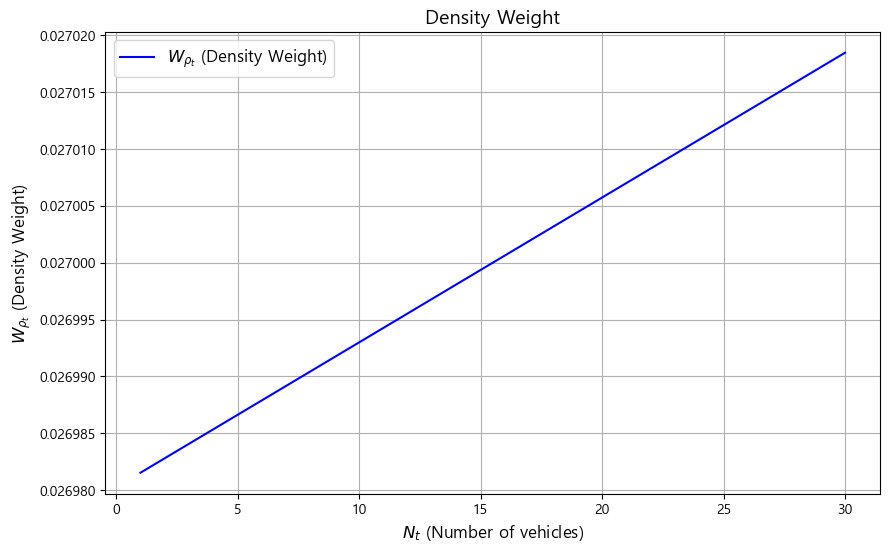

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import platform
from matplotlib import font_manager, rc
from matplotlib.ticker import ScalarFormatter

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')

W_base_rho = 0.027
F_rho = 0.01
W_min = 0.01
W_max = 0.10

R = 50
N_t = np.arange(1, 31)
rho_t = N_t / (np.pi * R**2)
rho_t_avg = np.mean(rho_t)


W_rho_t = np.clip(
    W_base_rho + np.maximum(
        -0.03, np.minimum((rho_t - rho_t_avg) * F_rho, 0.03)
    ),
    W_min, W_max
)

plt.figure(figsize=(10, 6))
plt.plot(N_t, W_rho_t, label="$W_{\\rho_t}$ (Density Weight)", color="blue")
plt.title("Density Weight", fontsize=14)
plt.xlabel("$N_t$ (Number of vehicles)", fontsize=12)
plt.ylabel("$W_{\\rho_t}$ (Density Weight)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()


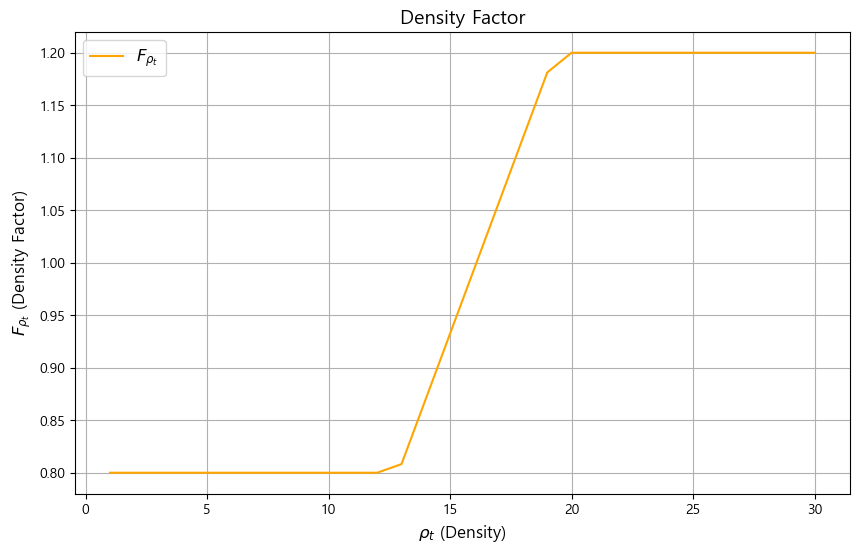

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')

R = 0.8
N_t = np.arange(1, 31)
rho_t = N_t / (np.pi * R**2)

F_rho_t = np.maximum(0.8, np.minimum(1.2, rho_t / 8.0))

W_base_rho = 0.027
F_rho = -0.001
W_min = 0.01
W_max = 0.10

R = 50
N_t = np.arange(1, 31)
rho_t = N_t / (np.pi * R**2)
rho_t_avg = np.mean(rho_t)


W_rho_t = np.clip(
    W_base_rho + np.maximum(
        -0.03, np.minimum((rho_t - rho_t_avg) * F_rho, 0.03)
    ),
    W_min, W_max
)

a = W_rho_t / F_rho_t


plt.figure(figsize=(10, 6))
plt.plot(N_t, F_rho_t, label="$F_{\\rho_t}$", color="orange")
plt.title("Density Factor", fontsize=14)
plt.xlabel("$\\rho_t$ (Density)", fontsize=12)
plt.ylabel("$F_{\\rho_t}$ (Density Factor)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()




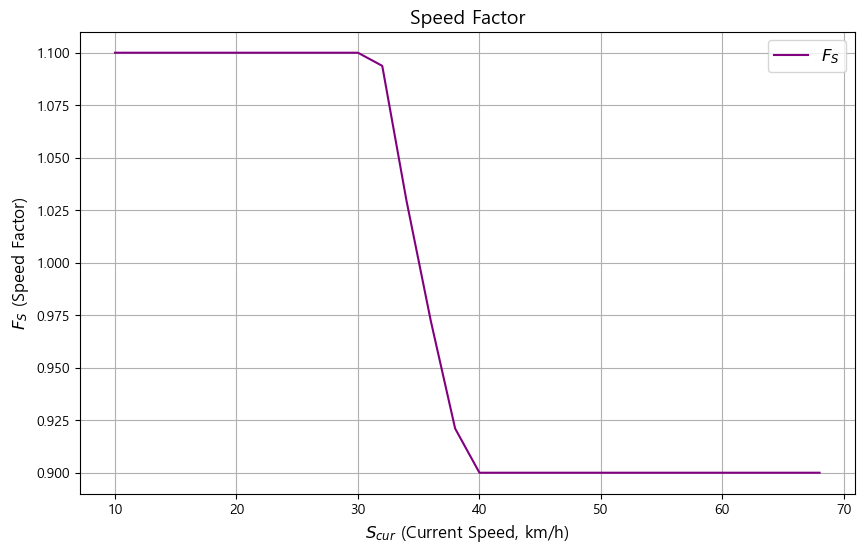

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

S_cur = np.arange(10, 70, 2) 

F_S = np.maximum(0.9, np.minimum(1.1, 35.0 / S_cur))

plt.figure(figsize=(10, 6))
plt.plot(S_cur, F_S, label="$F_S$", color="purple")
plt.title("Speed Factor", fontsize=14)
plt.xlabel("$S_{cur}$ (Current Speed, km/h)", fontsize=12)
plt.ylabel("$F_S$ (Speed Factor)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()


[1.00097441 1.00099928 1.00102415 1.00104902 1.00097906 1.00078881
 1.00052442 1.00028294 1.00005911 1.00015088 1.00034978 1.00053967
 1.00072215 1.0008873  1.00086243 1.00086243 1.0008873  1.0007713
 1.00061455 1.00046028 1.00030821 1.00015808 1.00000967 1.0001372
 1.00028269 1.00034544 1.00033684 1.00032722 1.00031668 1.0003053 ]


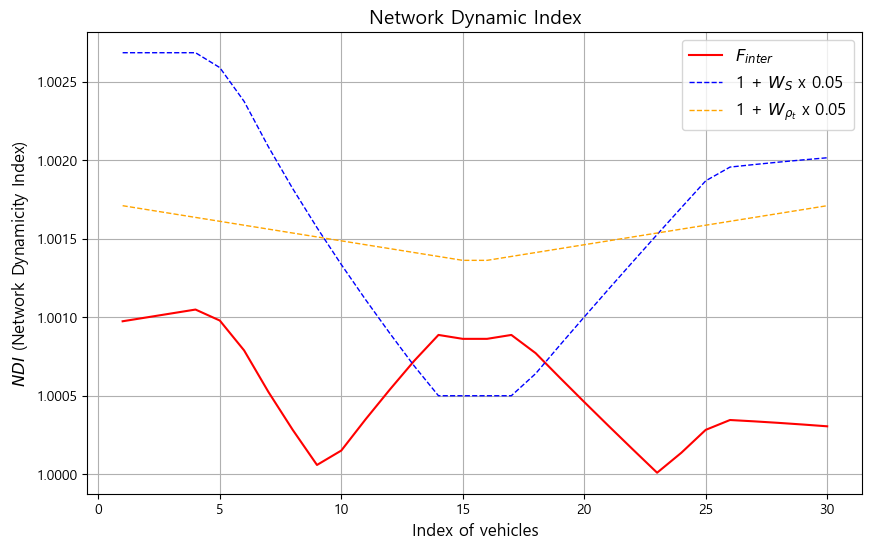

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')

R = 0.8  # Radius
N_t = np.arange(1, 31)
rho_t = N_t / (np.pi * R**2)
S_prev = np.arange(10, 70, 2)

S_cur = np.clip(S_prev + np.linspace(-15, 15, len(S_prev)), 0, None)

S_avg = np.mean(S_cur)

delta_S = np.where(S_prev != 0, np.abs(S_cur - S_prev) / S_prev, 0)

W_base_rho = 0.027
W_base_S = 0.0037

F_S = 0.001
F_change = 0.03
F_rho = 0.001
W_min = 0.01
W_max = 0.10
rho_t_avg = np.mean(rho_t)

W_rho_t = np.clip(
    W_base_rho + np.maximum(-0.03, np.minimum((rho_t - np.cumsum(rho_t) / np.arange(1, len(rho_t) + 1)) * 0.001, 0.03)),
    0.01, 0.10
)

W_rho_t = np.clip(
    W_base_rho + np.maximum(
        -0.03, np.minimum(abs(rho_t - rho_t_avg) * F_rho, 0.03)
    ),
    W_min, W_max
)

W_S = np.clip(
    W_base_S + 
    np.maximum(-0.03, np.minimum(np.abs(S_cur - S_avg) * 0.001, 0.03)) +
    np.maximum(-0.02, np.minimum(delta_S * F_change, 0.02)),
    0.01, 0.10
)

F_inter = 1.0 + abs(W_rho_t - W_S) * 0.05

df = S_cur - S_prev

print(F_inter)

plt.figure(figsize=(10, 6))

plt.plot(N_t, F_inter, label="$F_{inter}$", color="red")
plt.plot(N_t,1 + W_S * 0.05, label="1 + $W_{S}$ x 0.05", color="blue", linestyle="--", linewidth=1)
plt.plot(N_t,1 + W_rho_t * 0.05, label="1 + $W_{\\rho_{t}}$ x 0.05", color="orange", linestyle="--", linewidth=1)


plt.title("Network Dynamic Index", fontsize=14)
plt.xlabel("Index of vehicles", fontsize=12)
plt.ylabel("$NDI$ (Network Dynamicity Index)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()






[0.011      0.0109375  0.01029412 0.00972222 0.00921053 0.009
 0.009      0.00926262 0.01062346 0.0126     0.0126     0.01062346
 0.00926262 0.009      0.009      0.009      0.009      0.009
 0.009      0.009     ]
[0.07036215 0.06857166 0.06678116 0.06499067 0.06320018 0.06140968
 0.05961919 0.0578287  0.05603821 0.05424771 0.05245722 0.05066673
 0.04887623 0.04508167 0.04047622 0.03794646 0.03712608 0.03639685
 0.03574438 0.03515717]
[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.0102918  0.01180385 0.014      0.014      0.01180385
 0.0102918  0.01       0.01       0.01       0.01       0.01
 0.01       0.01      ]
[1.1        1.09375    1.02941176 0.97222222 0.92105263 0.9
 0.9        0.9        0.9        0.9        0.9        0.9
 0.9        0.9        0.9        0.9        0.9        0.9
 0.9        0.9       ]


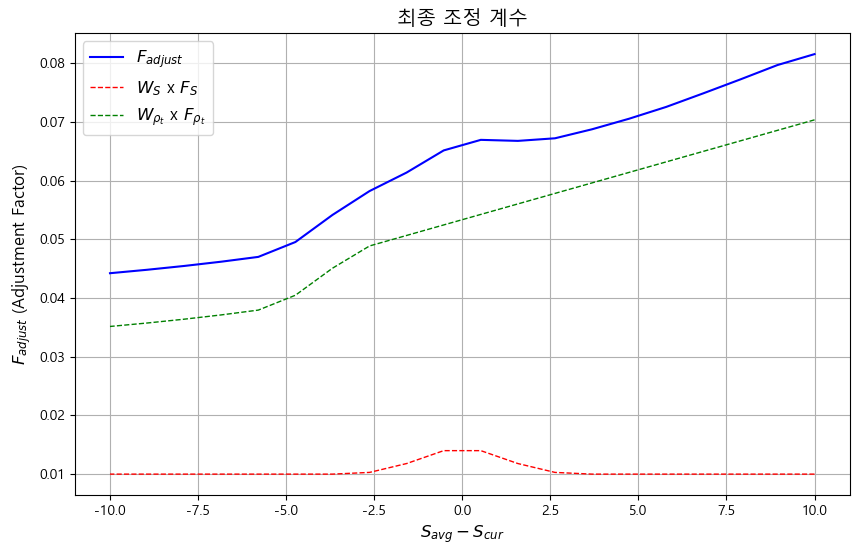

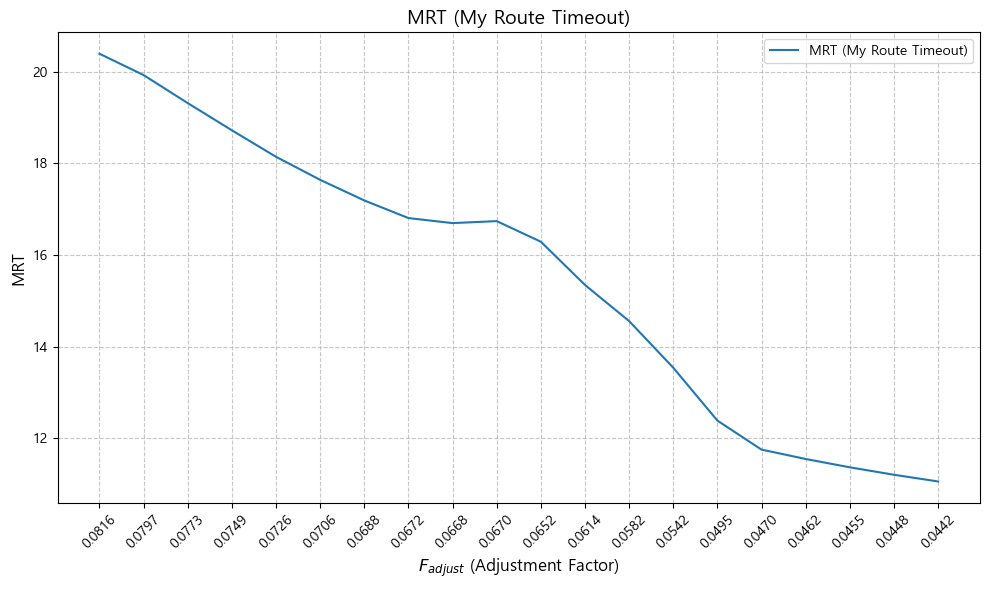

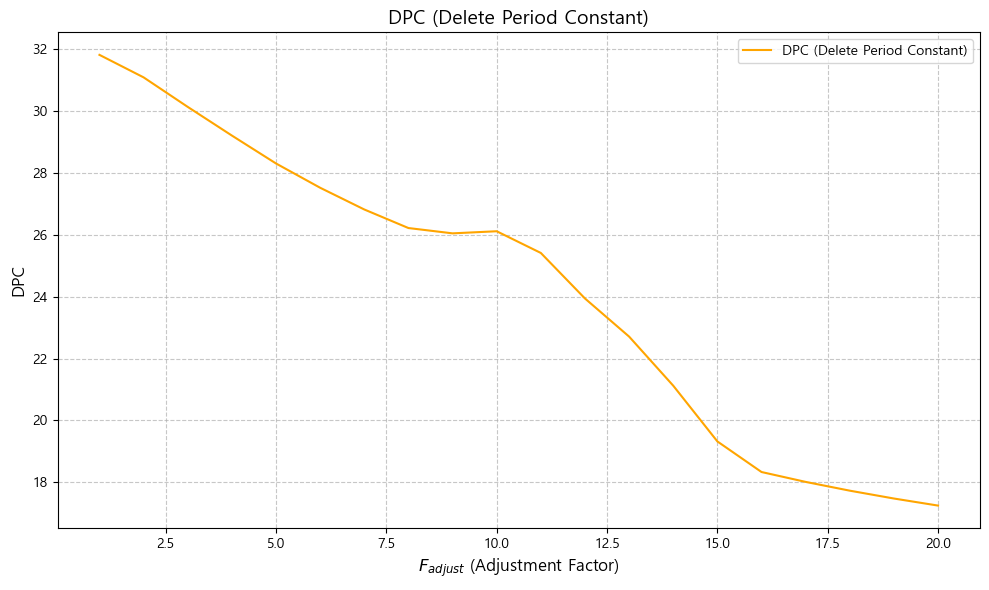

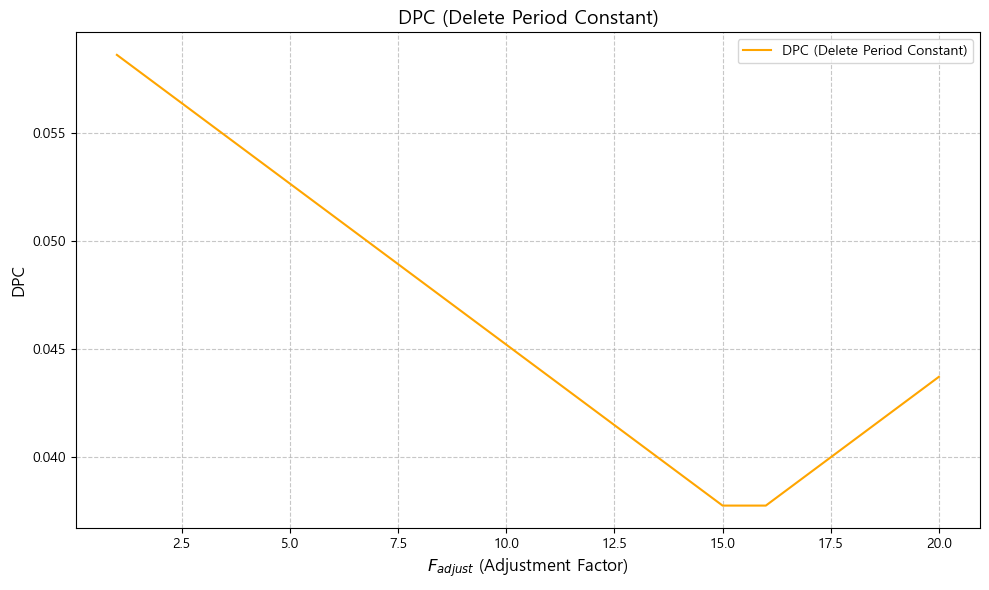

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')

MRT_min = 5.0
MRT_max = 300.0
MRT_base = 250.0


DPC_min = 5.0
DPC_max = 500.0
DPC_base = 390.0


R = 0.8
N_t = np.arange(1, 21)
rho_t = N_t / (np.pi * R**2)
S_prev = np.arange(10, 70, 2)
S_cur = np.clip(S_prev + np.linspace(-15, 15, len(S_prev)), 0, None)
#S_avg = np.cumsum(S_cur) / np.arange(1, len(S_cur) + 1)

S_cur = np.arange(30, 70, 2)
adjustment = np.linspace(10, -10, len(S_cur))  # Smoothly vary adjustment from +10 to -10
S_prev = S_cur + adjustment

S_avg = np.mean(S_cur)
delta_S = np.where(S_prev != 0, 1 - (np.abs(S_cur - S_prev) / S_prev), 0)

W_base_rho = 0.037
W_base_S = 0.037
F_change = -0.03
F_rho = 0.003

F_S = np.maximum(0.9, np.minimum(1.1, 35.0 / S_cur)) 

diff = np.linspace(10, - 10, len(S_cur))


W_rho_t = np.clip(
    W_base_rho + np.maximum(-0.03, np.minimum((rho_t - np.cumsum(rho_t) / np.arange(1, len(rho_t) + 1)) * 0.001, 0.03)),
    0.01, 0.10
)

W_rho_t = np.clip(
    W_base_rho + np.maximum(
        -0.03, np.minimum(np.abs(rho_t - rho_t_avg) * F_rho, 0.03)
    ),
    W_min, W_max
)

W_S = np.clip(
    W_base_S + 
    np.maximum(-0.03, np.minimum(np.abs(S_cur - S_avg) * -0.003, 0.03)) +
    np.maximum(-0.02, np.minimum(delta_S * F_change, 0.02)),
    0.01, 0.10
)


W_S = np.clip(
    W_base_S +
    np.maximum(
        -0.03,
        np.minimum(np.sqrt(np.abs(S_cur - S_avg)) * -0.003, 0.03)
    ) +
    np.maximum(
        -0.02,
        np.minimum(delta_S * -0.03, 0.02)
    ),
    W_min, W_max
)

F_rho_t = np.maximum(0.8, np.minimum(1.2, 8.0 / rho_t))

F_inter = 1.0 + (W_rho_t - W_S) * 0.05
F_adjust = (W_S * F_S + W_rho_t * F_rho_t) * F_inter

#print(W_S)
#print(W_rho_t)

#print(F_S)
#print(F_rho_t)

print(W_S * F_S)
print(W_rho_t * F_rho_t)

print(W_S)
print(F_S)

a = W_S #* F_S
b = W_rho_t * F_rho_t

# Plot
plt.figure(figsize=(10, 6))
plt.plot(diff, F_adjust, label="$F_{adjust}$", color="blue")


#plt.plot(N_t, W_S, label="$W_S$ (Speed Weight)", color="red", linestyle="--", linewidth=1)
#plt.plot(N_t, W_rho_t, label="$W_{\\rho_t}$ (Density Weight)", color="green", linestyle="--", linewidth=1)

plt.plot(diff, a, label="$W_S$ x $F_S$", color="red", linestyle="--", linewidth=1)
plt.plot(diff, b, label="$W_{\\rho_t}$ x $F_{\\rho_t}$", color="green", linestyle="--", linewidth=1)




plt.title("최종 조정 계수", fontsize=14)
plt.xlabel("$S_{\t{avg}} - S_{\t{cur}}$", fontsize=12)
plt.ylabel("$F_{adjust}$ (Adjustment Factor)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()

MRT = np.maximum(MRT_min, np.minimum(MRT_max, MRT_base * F_adjust))
DPC = np.maximum(DPC_min, np.minimum(DPC_max, DPC_base * F_adjust))

plt.figure(figsize=(10, 6))
plt.plot(MRT, marker=None, linestyle='-', label='MRT (My Route Timeout)')

# Set custom X-axis labels with 4 decimal places
plt.xticks(ticks=range(len(F_adjust)), labels=[f"{x:.4f}" for x in F_adjust], rotation=45)

plt.title('MRT (My Route Timeout)', fontsize=14)
plt.xlabel('$F_{adjust}$ (Adjustment Factor)', fontsize=12)
plt.ylabel('MRT', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()  # Adjust layout for label readability
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(N_t, DPC, marker=None, linestyle='-', label='DPC (Delete Period Constant)', color="orange")

# Set custom X-axis labels with 4 decimal places
#plt.xticks(ticks=range(len(F_adjust)), labels=[f"{x:.4f}" for x in F_adjust], rotation=45)

plt.title('DPC (Delete Period Constant)', fontsize=14)
plt.xlabel('$F_{adjust}$ (Adjustment Factor)', fontsize=12)
plt.ylabel('DPC', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()  # Adjust layout for label readability
plt.show()





plt.figure(figsize=(10, 6))
plt.plot(N_t, W_rho_t, marker=None, linestyle='-', label='DPC (Delete Period Constant)', color="orange")

# Set custom X-axis labels with 4 decimal places
#plt.xticks(ticks=range(len(F_adjust)), labels=[f"{x:.4f}" for x in F_adjust], rotation=45)

plt.title('DPC (Delete Period Constant)', fontsize=14)
plt.xlabel('$F_{adjust}$ (Adjustment Factor)', fontsize=12)
plt.ylabel('DPC', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()  # Adjust layout for label readability
plt.show()



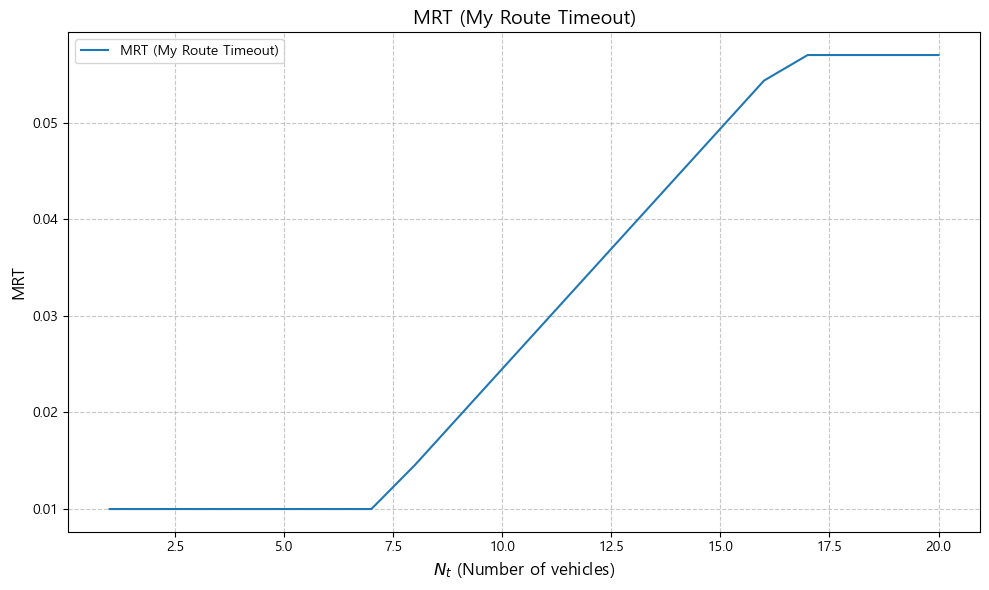

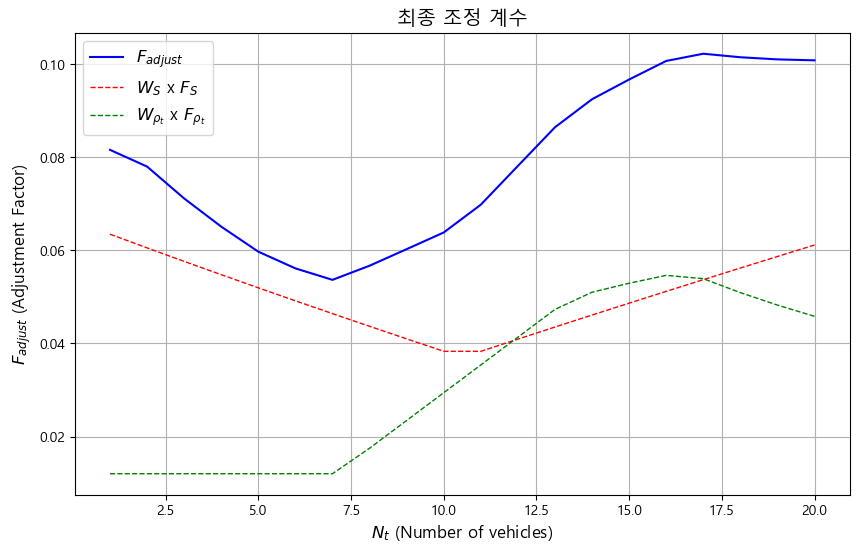

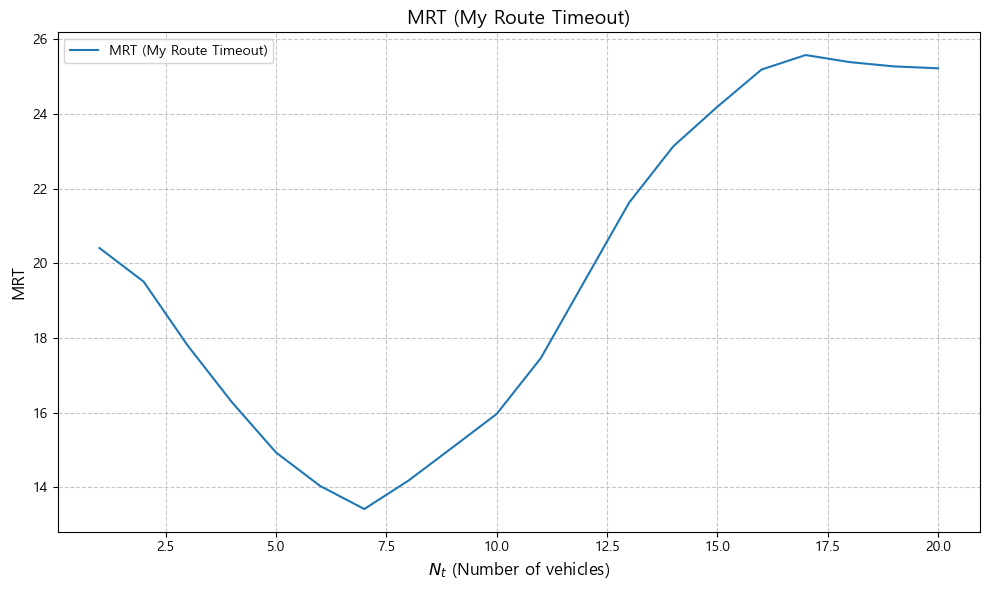

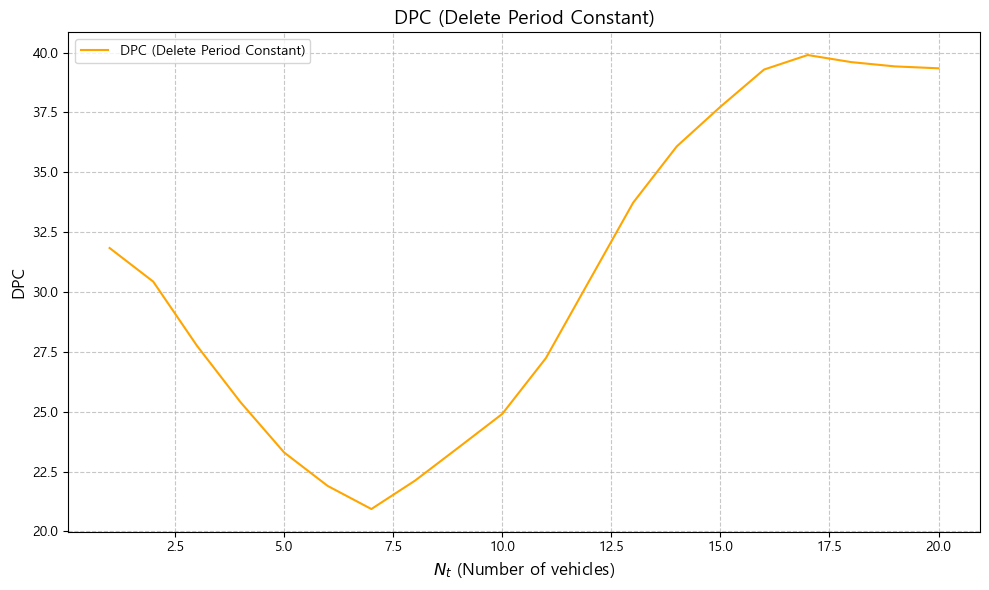

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')

MRT_min = 5.0
MRT_max = 300.0
MRT_base = 250.0


DPC_min = 5.0
DPC_max = 500.0
DPC_base = 390.0


R = 0.8
N_t = np.arange(1, 21)
rho_t = N_t / (np.pi * R**2)
#S_prev = np.arange(30, 70, 2)


S_cur = np.arange(30, 70, 2)

adjustment = np.linspace(10, -10, len(S_cur)) 
S_prev = S_cur + adjustment
#S_cur = np.clip(S_prev + np.linspace(-15, 15, len(S_prev)), 0, None)
#S_avg = np.cumsum(S_cur) / np.arange(1, len(S_cur) + 1)
S_avg = np.mean(S_cur)
delta_S = np.where(S_prev != 0, (np.abs(S_cur - S_prev) / S_prev), 0)

W_base_rho = 0.027
W_base_S = 0.037
F_change = 0.03
F_rho = 0.01

F_S = np.maximum(0.9, np.minimum(1.1, 35.0 / S_cur)) 

diff = np.linspace(10, - 10, len(S_cur))
rho_t_avg = np.mean(rho_t)

W_rho_t = np.clip(
    W_base_rho + np.maximum(-0.03, np.minimum((rho_t - np.cumsum(rho_t) / np.arange(1, len(rho_t) + 1)) * 0.001, 0.03)),
    0.01, 0.10
)




# Calculate W_rho_t
W_rho_t = np.clip(
    W_base_rho + np.maximum(
        -0.03, np.minimum((rho_t - rho_t_avg) * F_rho, 0.03)
    ),
    W_min, W_max
)



W_S = np.clip(
    W_base_S + 
    np.maximum(-0.03, np.minimum(np.abs(S_cur - S_avg) * 0.001, 0.03)) +
    np.maximum(-0.02, np.minimum(delta_S * F_change, 0.02)),
    0.01, 0.10
)




F_rho_t = np.maximum(0.8, np.minimum(1.2, 8.0 / rho_t))

F_inter = 1.0 + (W_rho_t - W_S) * 0.05
F_adjust = (W_S * F_S + W_rho_t * F_rho_t) * F_inter

#print(W_S)
#print(W_rho_t)

#print(F_S)
#print(F_rho_t)

a = W_S #* F_S
b = W_rho_t * F_rho_t

df = S_avg - S_cur






plt.figure(figsize=(10, 6))
plt.plot(N_t, W_rho_t, marker=None, linestyle='-', label='MRT (My Route Timeout)')

# Set custom X-axis labels with 4 decimal places
#plt.xticks(ticks=range(len(F_adjust)), labels=[f"{x:.4f}" for x in F_adjust], rotation=45)

plt.title('MRT (My Route Timeout)', fontsize=14)
plt.xlabel("$N_t$ (Number of vehicles)", fontsize=12)
plt.ylabel('MRT', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()  # Adjust layout for label readability
plt.show()







# Plot
plt.figure(figsize=(10, 6))
plt.plot(N_t, F_adjust, label="$F_{adjust}$", color="blue")


#plt.plot(N_t, W_S, label="$W_S$ (Speed Weight)", color="red", linestyle="--", linewidth=1)
#plt.plot(N_t, W_rho_t, label="$W_{\\rho_t}$ (Density Weight)", color="green", linestyle="--", linewidth=1)

plt.plot(N_t, a, label="$W_S$ x $F_S$", color="red", linestyle="--", linewidth=1)
plt.plot(N_t, b, label="$W_{\\rho_t}$ x $F_{\\rho_t}$", color="green", linestyle="--", linewidth=1)




plt.title("최종 조정 계수", fontsize=14)
#plt.xlabel("$S_{\t{avg}} - S_{\t{cur}}$", fontsize=12)
plt.xlabel("$N_t$ (Number of vehicles)", fontsize=12)
plt.ylabel("$F_{adjust}$ (Adjustment Factor)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()

MRT = np.maximum(MRT_min, np.minimum(MRT_max, MRT_base * F_adjust))
DPC = np.maximum(DPC_min, np.minimum(DPC_max, DPC_base * F_adjust))

plt.figure(figsize=(10, 6))
plt.plot(N_t, MRT, marker=None, linestyle='-', label='MRT (My Route Timeout)')

# Set custom X-axis labels with 4 decimal places
#plt.xticks(ticks=range(len(F_adjust)), labels=[f"{x:.4f}" for x in F_adjust], rotation=45)

plt.title('MRT (My Route Timeout)', fontsize=14)
plt.xlabel("$N_t$ (Number of vehicles)", fontsize=12)
plt.ylabel('MRT', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()  # Adjust layout for label readability
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(N_t, DPC, marker=None, linestyle='-', label='DPC (Delete Period Constant)', color="orange")

# Set custom X-axis labels with 4 decimal places
#plt.xticks(ticks=range(len(F_adjust)), labels=[f"{x:.4f}" for x in F_adjust], rotation=45)

plt.title('DPC (Delete Period Constant)', fontsize=14)
plt.xlabel("$N_t$ (Number of vehicles)", fontsize=12)
plt.ylabel('DPC', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()  # Adjust layout for label readability
plt.show()



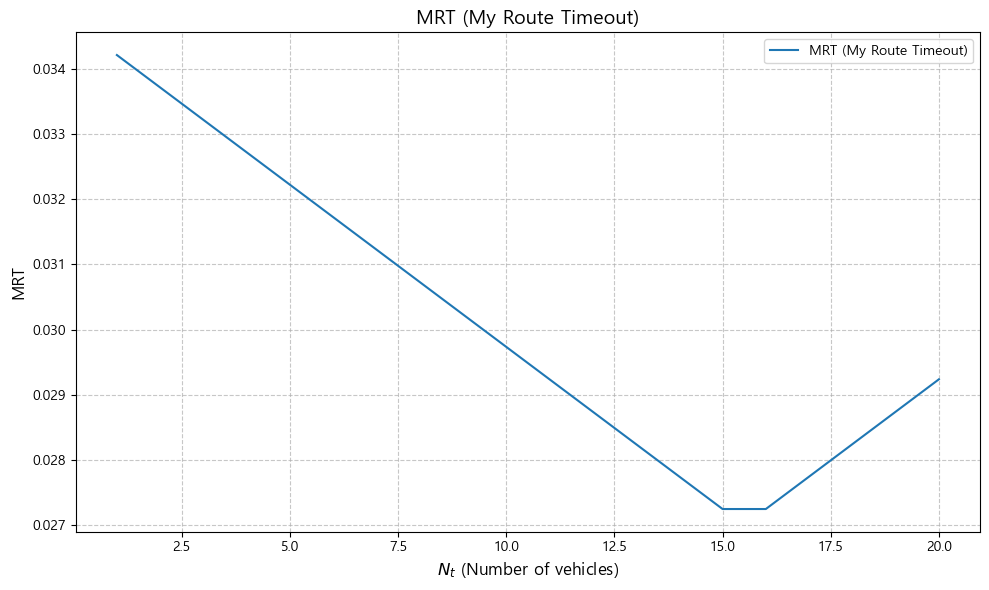

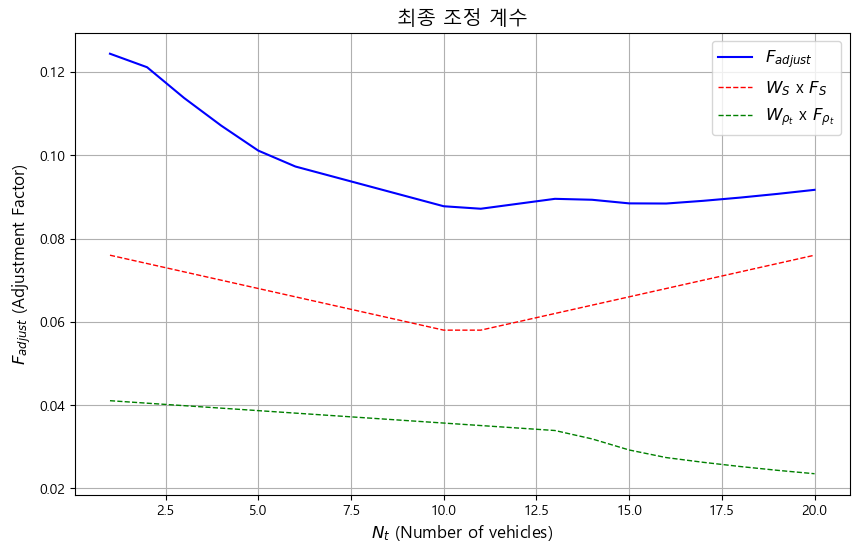

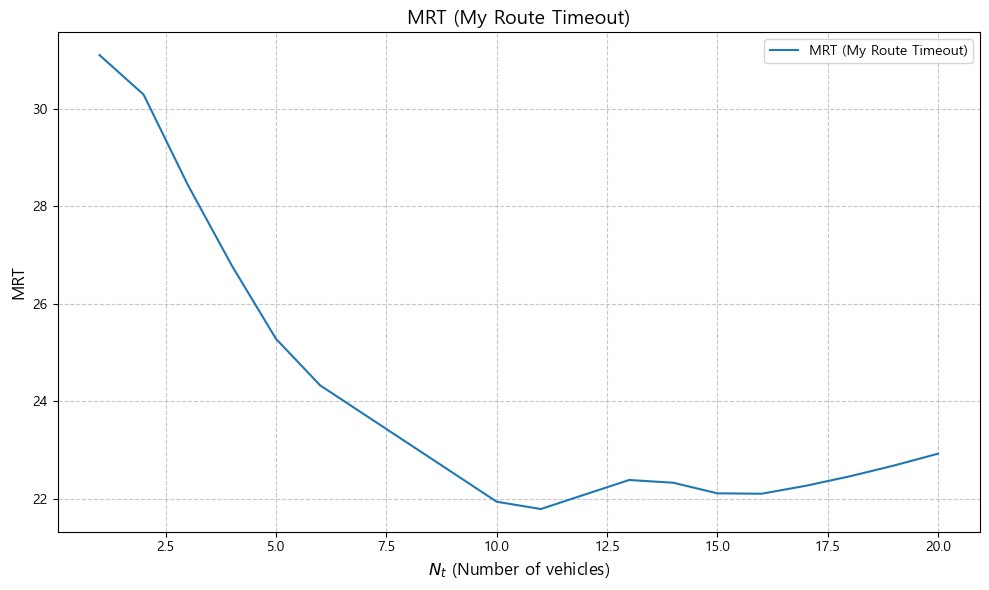

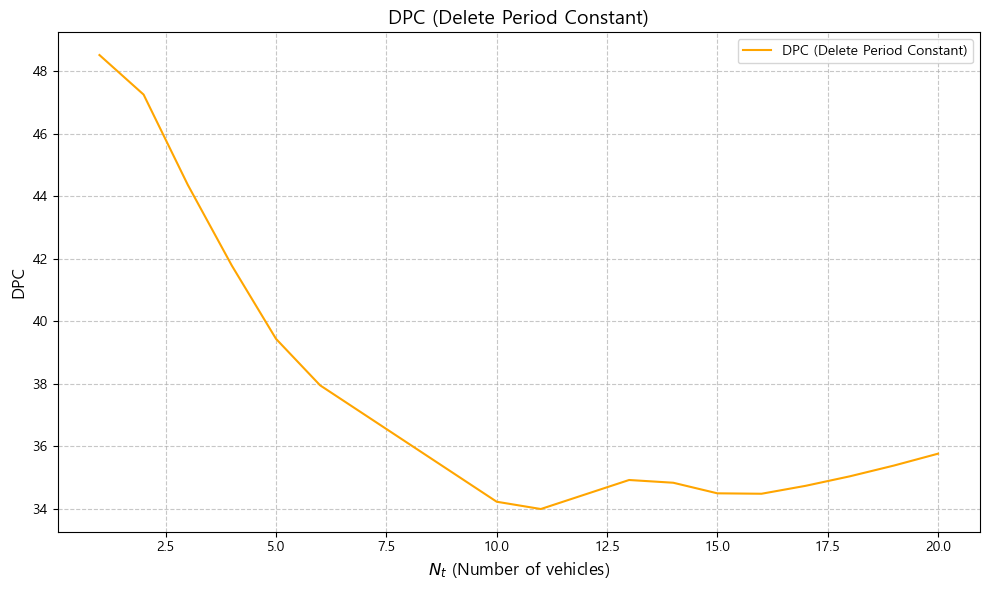

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')

MRT_min = 5.0
MRT_max = 300.0
MRT_base = 250.0


DPC_min = 5.0
DPC_max = 500.0
DPC_base = 390.0


R = 0.8
N_t = np.arange(1, 21)
rho_t = N_t / (np.pi * R**2)
#S_prev = np.arange(30, 70, 2)


S_cur = np.arange(30, 70, 2)

adjustment = np.linspace(10, -10, len(S_cur)) 
S_prev = S_cur + adjustment
#S_cur = np.clip(S_prev + np.linspace(-15, 15, len(S_prev)), 0, None)
#S_avg = np.cumsum(S_cur) / np.arange(1, len(S_cur) + 1)
S_avg = np.mean(S_cur)
delta_S = np.where(S_prev != 0, 1 - (np.abs(S_cur - S_prev) / S_prev), 0)

W_base_rho = 0.027
W_base_S = 0.037
F_change = 0.03
F_rho = 0.001

F_S = np.maximum(0.9, np.minimum(1.1, 35.0 / S_cur)) 

diff = np.linspace(10, - 10, len(S_cur))


W_rho_t = np.clip(
    W_base_rho + np.maximum(-0.03, np.minimum((rho_t - np.cumsum(rho_t) / np.arange(1, len(rho_t) + 1)) * 0.001, 0.03)),
    0.01, 0.10
)

W_rho_t = np.clip(
    W_base_rho + np.maximum(
        -0.03, np.minimum(np.abs(rho_t - rho_t_avg) * F_rho, 0.03)
    ),
    W_min, W_max
)

W_S = np.clip(
    W_base_S + 
    np.maximum(-0.03, np.minimum(np.abs(S_cur - S_avg) * 0.001, 0.03)) +
    np.maximum(-0.02, np.minimum(delta_S * F_change, 0.02)),
    0.01, 0.10
)

F_rho_t = np.maximum(0.8, np.minimum(1.2, 8.0 / rho_t))

F_inter = 1.0 + (W_rho_t - W_S) * 0.05
F_adjust = (W_S * F_S + W_rho_t * F_rho_t) * F_inter

#print(W_S)
#print(W_rho_t)

#print(F_S)
#print(F_rho_t)

a = W_S #* F_S
b = W_rho_t * F_rho_t

df = S_avg - S_cur




plt.figure(figsize=(10, 6))
plt.plot(N_t, W_rho_t, marker=None, linestyle='-', label='MRT (My Route Timeout)')

# Set custom X-axis labels with 4 decimal places
#plt.xticks(ticks=range(len(F_adjust)), labels=[f"{x:.4f}" for x in F_adjust], rotation=45)

plt.title('MRT (My Route Timeout)', fontsize=14)
plt.xlabel("$N_t$ (Number of vehicles)", fontsize=12)
plt.ylabel('MRT', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()  # Adjust layout for label readability
plt.show()







# Plot
plt.figure(figsize=(10, 6))
plt.plot(N_t, F_adjust, label="$F_{adjust}$", color="blue")


#plt.plot(N_t, W_S, label="$W_S$ (Speed Weight)", color="red", linestyle="--", linewidth=1)
#plt.plot(N_t, W_rho_t, label="$W_{\\rho_t}$ (Density Weight)", color="green", linestyle="--", linewidth=1)

plt.plot(N_t, a, label="$W_S$ x $F_S$", color="red", linestyle="--", linewidth=1)
plt.plot(N_t, b, label="$W_{\\rho_t}$ x $F_{\\rho_t}$", color="green", linestyle="--", linewidth=1)




plt.title("최종 조정 계수", fontsize=14)
#plt.xlabel("$S_{\t{avg}} - S_{\t{cur}}$", fontsize=12)
plt.xlabel("$N_t$ (Number of vehicles)", fontsize=12)
plt.ylabel("$F_{adjust}$ (Adjustment Factor)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()

MRT = np.maximum(MRT_min, np.minimum(MRT_max, MRT_base * F_adjust))
DPC = np.maximum(DPC_min, np.minimum(DPC_max, DPC_base * F_adjust))

plt.figure(figsize=(10, 6))
plt.plot(N_t, MRT, marker=None, linestyle='-', label='MRT (My Route Timeout)')

# Set custom X-axis labels with 4 decimal places
#plt.xticks(ticks=range(len(F_adjust)), labels=[f"{x:.4f}" for x in F_adjust], rotation=45)

plt.title('MRT (My Route Timeout)', fontsize=14)
plt.xlabel("$N_t$ (Number of vehicles)", fontsize=12)
plt.ylabel('MRT', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()  # Adjust layout for label readability
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(N_t, DPC, marker=None, linestyle='-', label='DPC (Delete Period Constant)', color="orange")

# Set custom X-axis labels with 4 decimal places
#plt.xticks(ticks=range(len(F_adjust)), labels=[f"{x:.4f}" for x in F_adjust], rotation=45)

plt.title('DPC (Delete Period Constant)', fontsize=14)
plt.xlabel("$N_t$ (Number of vehicles)", fontsize=12)
plt.ylabel('DPC', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()  # Adjust layout for label readability
plt.show()



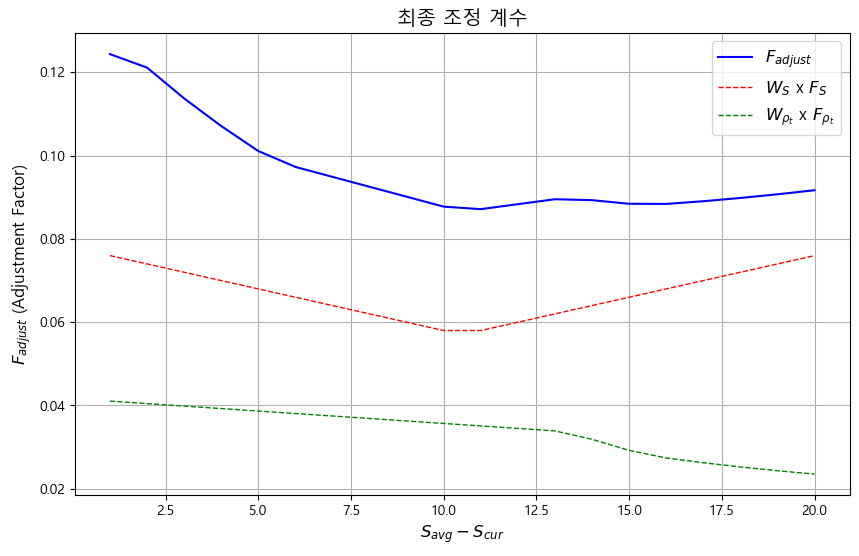

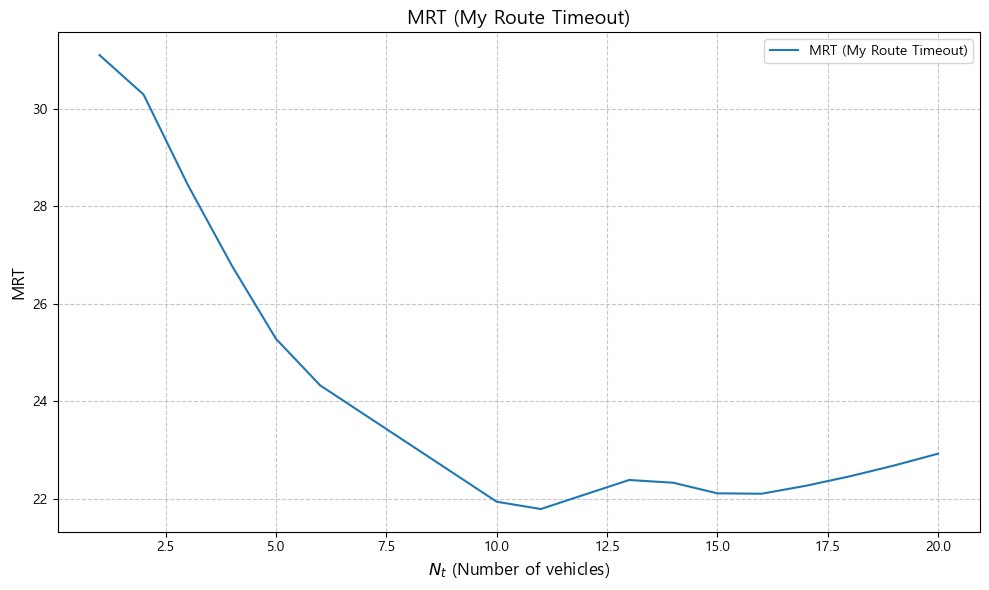

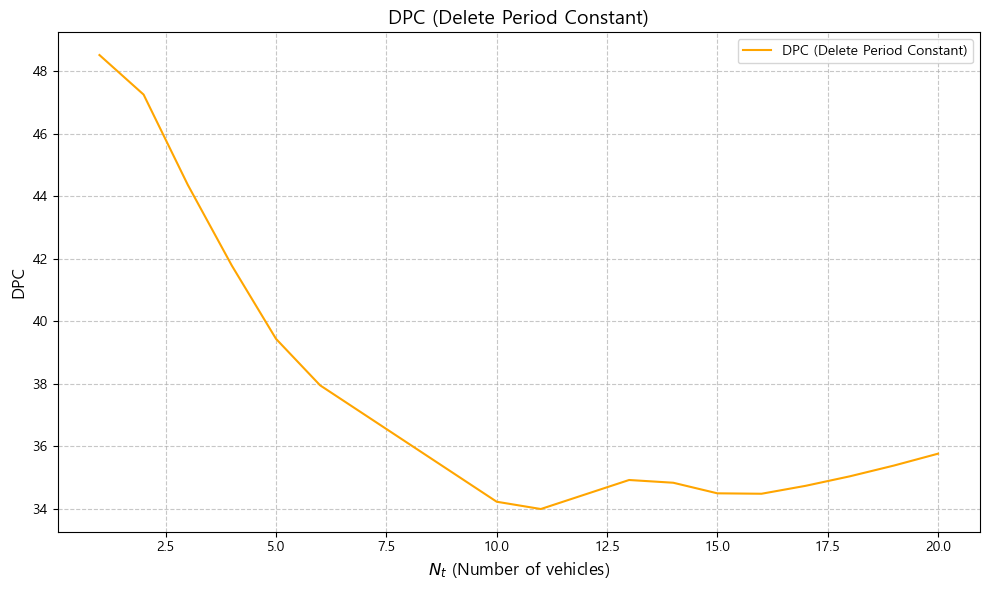

In [14]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(N_t, F_adjust, label="$F_{adjust}$", color="blue")


#plt.plot(N_t, W_S, label="$W_S$ (Speed Weight)", color="red", linestyle="--", linewidth=1)
#plt.plot(N_t, W_rho_t, label="$W_{\\rho_t}$ (Density Weight)", color="green", linestyle="--", linewidth=1)

plt.plot(N_t, a, label="$W_S$ x $F_S$", color="red", linestyle="--", linewidth=1)
plt.plot(N_t, b, label="$W_{\\rho_t}$ x $F_{\\rho_t}$", color="green", linestyle="--", linewidth=1)




plt.title("최종 조정 계수", fontsize=14)
plt.xlabel("$S_{\t{avg}} - S_{\t{cur}}$", fontsize=12)
#plt.xlabel("$N_t$ (Number of vehicles)", fontsize=12)
plt.ylabel("$F_{adjust}$ (Adjustment Factor)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()

MRT = np.maximum(MRT_min, np.minimum(MRT_max, MRT_base * F_adjust))
DPC = np.maximum(DPC_min, np.minimum(DPC_max, DPC_base * F_adjust))

plt.figure(figsize=(10, 6))
plt.plot(N_t, MRT, marker=None, linestyle='-', label='MRT (My Route Timeout)')

# Set custom X-axis labels with 4 decimal places
#plt.xticks(ticks=range(len(F_adjust)), labels=[f"{x:.4f}" for x in F_adjust], rotation=45)

plt.title('MRT (My Route Timeout)', fontsize=14)
plt.xlabel("$N_t$ (Number of vehicles)", fontsize=12)
plt.ylabel('MRT', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()  # Adjust layout for label readability
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(N_t, DPC, marker=None, linestyle='-', label='DPC (Delete Period Constant)', color="orange")

# Set custom X-axis labels with 4 decimal places
#plt.xticks(ticks=range(len(F_adjust)), labels=[f"{x:.4f}" for x in F_adjust], rotation=45)

plt.title('DPC (Delete Period Constant)', fontsize=14)
plt.xlabel("$N_t$ (Number of vehicles)", fontsize=12)
plt.ylabel('DPC', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()  # Adjust layout for label readability
plt.show()

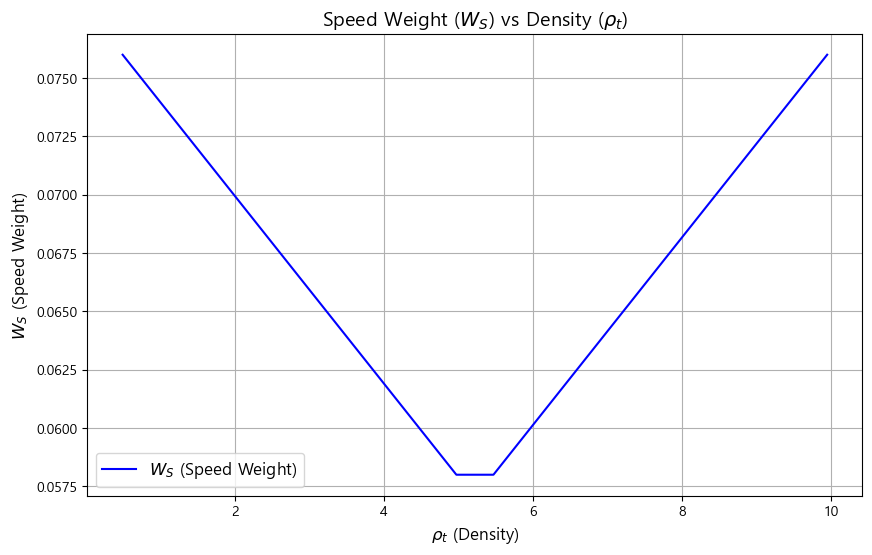

In [15]:
# Plot W_S (Speed Weight) vs rho_t (Density)
plt.figure(figsize=(10, 6))
plt.plot(rho_t, W_S[:len(rho_t)], label="$W_S$ (Speed Weight)", color="blue")
plt.title("Speed Weight ($W_S$) vs Density ($\\rho_t$)", fontsize=14)
plt.xlabel("$\\rho_t$ (Density)", fontsize=12)
plt.ylabel("$W_S$ (Speed Weight)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()


In [16]:
import matplotlib.pyplot as plt
import numpy as np
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')

# Given data
data = T

# X-axis labels
x_labels = F_adjust

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(data, marker=None, linestyle='-', label='MRT (My Route Timeout)')

# Set custom X-axis labels with 4 decimal places
plt.xticks(ticks=range(len(x_labels)), labels=[f"{x:.4f}" for x in x_labels], rotation=45)

plt.title('MRT (My Route Timeout)', fontsize=14)
plt.xlabel('F_adjust (Adjustment Factor)', fontsize=12)
plt.ylabel('MRT', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()  # Adjust layout for label readability
plt.show()


NameError: name 'T' is not defined

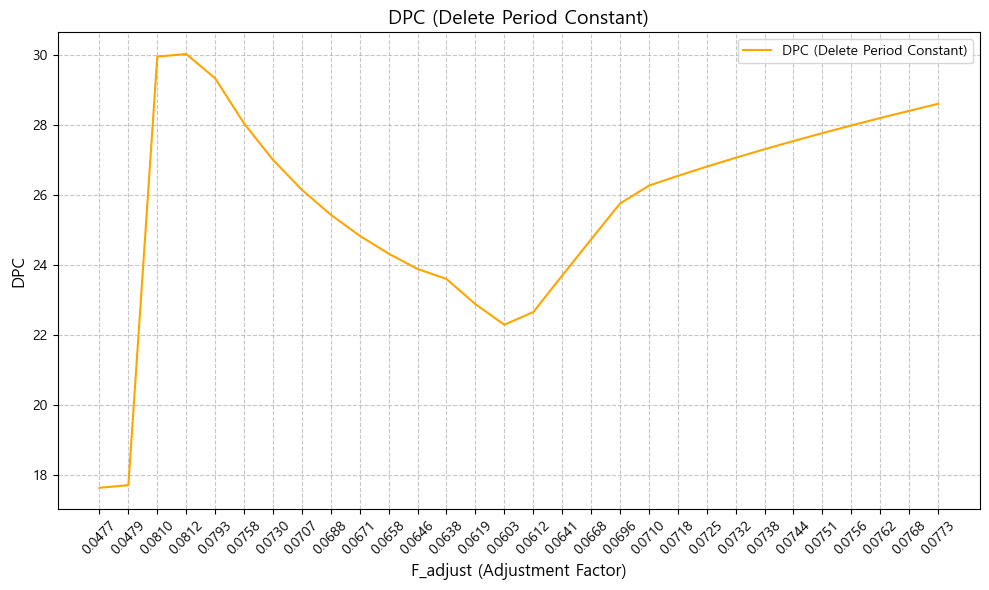

In [145]:
import matplotlib.pyplot as plt
import numpy as np
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')

# Second dataset (Y-axis data)
data_2 = T_del

# Custom X-axis data (labels for the X-axis)
x_labels = F_adjust

# Plotting the second dataset
plt.figure(figsize=(10, 6))
plt.plot(data_2, marker=None, linestyle='-', color='orange', label='DPC (Delete Period Constant)')

# Set custom X-axis labels
plt.xticks(ticks=range(len(x_labels)), labels=[f"{x:.4f}" for x in x_labels], rotation=45)

plt.title('DPC (Delete Period Constant)', fontsize=14)
plt.xlabel('F_adjust (Adjustment Factor)', fontsize=12)
plt.ylabel('DPC', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()  # Adjust layout for label readability
plt.show()
